# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

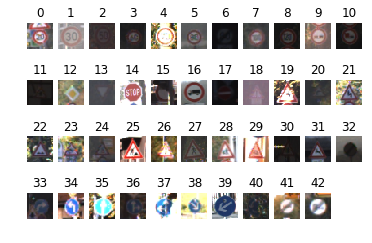

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Loop all labels and plot one sample of each
for i in set(y_train):
    for n in range(len(y_train)):
        if y_train[n] == i:
            plt.subplot(4, 11, i+1)
            plt.imshow(X_train[n], cmap="gray")
            plt.axis('off')
            plt.title(y_train[n])
            break
            

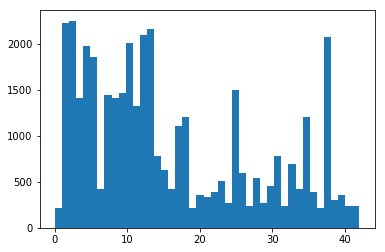

In [4]:
plt.hist(y_train, n_classes)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

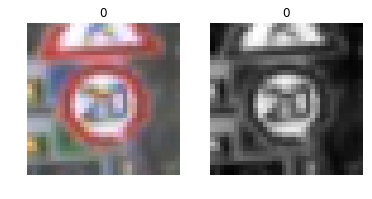

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

# Shuffle the dataset and convert to grayscale
import numpy as np

plt.subplot(1, 2, 1)
plt.imshow(X_train[0], cmap="gray")
plt.axis('off')
plt.title(y_train[0])


def rgb2gray(rgb):
    return np.dot(rgb, [0.299, 0.587, 0.114])

X_train_gray = [rgb2gray(img).reshape(32,32,1) for img in X_train]
X_test_gray = [rgb2gray(img).reshape(32,32,1) for img in X_test]

# quick test about rgb2gray conversion
plt.subplot(1, 2, 2)
plt.imshow(X_train_gray[0].reshape(32,32), cmap='gray')
plt.axis('off')
plt.title(y_train[0]);

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I convert rgb image to grayscale for reducing the parameters to learn, which make the training process quicker and more efficient, because the color doesn't matter so much for classifying the traffic signs.


In [6]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.cross_validation import train_test_split

X_train_gray_sub, X_validation, y_train_sub, y_validation = train_test_split(X_train_gray, y_train, test_size=0.33, random_state=100)

# print number of train and validation set
print(len(X_train_gray_sub))
print(len(X_validation))

26270
12939


/Users/wucong/anaconda3/envs/CarND-Traffic-Sign-Classifier-Project/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
I split the data into a training set(2/3) and validation set(1/3). The reason for this split is to prevent the overfitting. The testing data is alrealy in the dataset, which was split between traning and testing data.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Implement LeNet-5
import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    k = 2
    
    # Layer 1: Convolutional (32*32*1->28*28*6)
    W_1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="w_1")
    b_1 = tf.Variable(tf.zeros(6), name="b_1")
    conv1 = tf.nn.conv2d(x, W_1, strides=[1, 1, 1, 1], padding='VALID') + b_1
    conv1 = tf.nn.relu(conv1)
    # Pooling: (28*28*6->14*14*6)
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional (14*14*6->10*10*16)
    W_2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="w_2")
    b_2 = tf.Variable(tf.zeros(16), name="b_2")
    conv2 = tf.nn.conv2d(conv1, W_2, strides=[1, 1, 1, 1], padding='VALID') + b_2
    conv2 = tf.nn.relu(conv2)
    # Pooling: (10*10*16->5*5*16)
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #Flatten (5*5*16 = 400)
    fconv0   = flatten(conv2)
    
    # Layer 3: Fully Connected. (400->120)
    W_3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma), name="w_3")
    b_3 = tf.Variable(tf.zeros(120), name="b_3")
    fconv1 = tf.matmul(fconv0, W_3) + b_3
    fconv1 = tf.nn.relu(fconv1)
    
    # Layer 4: Fully Connected. (120->84)
    W_4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma), name="w_4")
    b_4 = tf.Variable(tf.zeros(84), name="b_4")
    fconv2 = tf.matmul(fconv1, W_4) + b_4
    fconv2 = tf.nn.relu(fconv2)
    
    # Layer 4: Fully Connected. (84->43)
    W_5 = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma), name="w_5")
    b_5 = tf.Variable(tf.zeros(n_classes), name="b_5")
    fconv3 = tf.matmul(fconv2, W_5) + b_5
    
    return fconv3
    

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture is a convolutional neural network, which consists 5 layers. This is an instance of the LeNet architecture. 

The first layer is convolutional layer with max pooling and ReLU, which convert size from 32*32*1 to 14*14*6;

The second layer is convolutional layer with max pooling and ReLU, which convert size from 14*14*6 to 5*5*16;

The third layer is fully connected layer with ReLU, which convert size from 400 to 120;

The fourth layer is fully connected layer with ReLU, which convert size from 120 to 84;

The last layer is fully connected layer with ReLU, which convert size from 84 to 43;


In [8]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

# Hyperparameters
learning_rate = 0.001
EPOCHS = 35
BATCH_SIZE = 64

# Training pipeline
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

init_op = tf.global_variables_initializer()
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

with tf.Session() as sess:
    sess.run(init_op)
    num_examples = len(X_train_gray_sub)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_gray_sub[offset:end], y_train_sub[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    save_path = saver.save(sess, "./my_model")
    print("Model saved in file: %s" % save_path)
    test_accuracy = evaluate(X_test_gray, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

Training...

EPOCH 1 ...
Validation Accuracy = 0.795

EPOCH 2 ...
Validation Accuracy = 0.885

EPOCH 3 ...
Validation Accuracy = 0.912

EPOCH 4 ...
Validation Accuracy = 0.928

EPOCH 5 ...
Validation Accuracy = 0.932

EPOCH 6 ...
Validation Accuracy = 0.941

EPOCH 7 ...
Validation Accuracy = 0.947

EPOCH 8 ...
Validation Accuracy = 0.951

EPOCH 9 ...
Validation Accuracy = 0.956

EPOCH 10 ...
Validation Accuracy = 0.963

EPOCH 11 ...
Validation Accuracy = 0.947

EPOCH 12 ...
Validation Accuracy = 0.966

EPOCH 13 ...
Validation Accuracy = 0.958

EPOCH 14 ...
Validation Accuracy = 0.961

EPOCH 15 ...
Validation Accuracy = 0.961

EPOCH 16 ...
Validation Accuracy = 0.972

EPOCH 17 ...
Validation Accuracy = 0.966

EPOCH 18 ...
Validation Accuracy = 0.960

EPOCH 19 ...
Validation Accuracy = 0.965

EPOCH 20 ...
Validation Accuracy = 0.970

EPOCH 21 ...
Validation Accuracy = 0.954

EPOCH 22 ...
Validation Accuracy = 0.966

EPOCH 23 ...
Validation Accuracy = 0.979

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I use Adam optimizer and cross entropy loss to train my model. Accordingly the batch size is set to 64, epoch is 25 and learning rate is 0.001. 

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

I start with the parameters in CarND-LeNet-Lab, which is (Batch_size,epoch,learning_rate) = (128,10,0.001) which get the highest validation accuracy = 0.952 at last epoch.

Then I keep the batch_size and learning_rate as the same, only change the epoch to 20, to see if it was better or not, because maybe the 10 epochs is not enough for convergence. The result shows better accuracy rate 0.970 at the last epoch, so right now (128,20,0.001) is the best configuration.

Then I play the number of the learning rate with 0.01 and 0.001, which is significantly worse, so learning rate = 0.001 should be suitable for this case.

Essentially the batch_size and epoch is a trade-off relation to get the better learning result, so I played several different combination of these two parameters and choose (64,35,0.001) as my final parameters for training, which gets the highest accuracy = 0.983

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

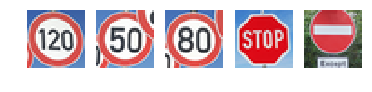

In [9]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.image as mpimg

image_paths = ['rsz_1.png','rsz_2.png','rsz_3.png','rsz_4.png','rsz_5.png']

images_set=[]
for i in range(len(image_paths)):    
    img = mpimg.imread(image_paths[i])
    images_set.append(img)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(img)

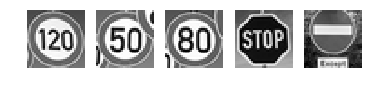

In [10]:
# convert images to grayscale
import numpy as np

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

images_set_gray = [rgb2gray(img).reshape(32,32,1) for img in images_set]

for i in range(len(images_set_gray)):    
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.imshow(images_set_gray[i].reshape(32,32),cmap="gray")

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
All the images need to be preprocessed to be 32x32 pixels and convert to grayscale to satisfy the model.The last one might be a little bit difficult, these is another sign under the no entry sign.

In [11]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.softmax(logits), feed_dict={x: images_set_gray})
for result in results:
    print(np.argmax(result))

8
5
5
8
5


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
With these 5 self captured images, the truth_label should be [8,2,5,14,17], the prediction is [8,5,5,8,5]. So the accuracy for these images is 40%.

In [13]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    values, indices = sess.run(tf.nn.top_k(results, k=5))
    print(values)
    print(indices)

[[ 0.23417737  0.12085143  0.09268212  0.06990317  0.06011643]
 [ 0.14403284  0.12015388  0.08145109  0.08067933  0.07106364]
 [ 0.14568655  0.11210155  0.09826245  0.08097003  0.05628521]
 [ 0.15323555  0.1123517   0.09479231  0.08275341  0.08198418]
 [ 0.16667689  0.11536751  0.07133847  0.0664888   0.05934646]]
[[ 8  5 20 38  7]
 [ 5  8 20 40  1]
 [ 5  8 40 20  1]
 [ 8 40  5 20 38]
 [ 5 20  3  8 38]]


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
From the certainty visualization we can see that every prediction is not near 100% certain, so the new images are totally different with the dataset we used to train. A lot of improvement need to do for this training.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.